<a href="https://colab.research.google.com/github/lhtrevisani/tt1-player-clustering/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Player clustering

## Configuración del entorno y preparación de los datos

Importo las librerías a utilizar

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
from google.colab import output

from ipywidgets import interact, widgets
from IPython.display import display, HTML

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Levanto el dataset a utilizar:

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
## Fbref.com: big 5 leagues player stats 2021-22
df_stats = pd.read_csv('/content/drive/MyDrive/Maestría en Explotación de Datos/2 - Maestría/Taller de tesis 1/data/dataset_final.csv', index_col = 0)

Se van a ignorar algunas variables:

In [26]:
cols_to_ignore = ['Age', 'PK', 'Gls', 'G+A', 'xG+xAG', 'xG', 'npxG+xAG', 'G+A_minus_PK', 'G_minus_xG_Expected', 'Cmp_Total', 'Cmp_Short', 'Cmp_Medium', 'Cmp_Long', 'Live_Pass', 'Dead_Pass', 'TklW_Tackles', 'Min_Playing.Time', \
                'Def 3rd_Tackles', 'Mid 3rd_Tackles', 'Att 3rd_Tackles', 'Tkl_Challenges', 'Lost_Challenges', 'Blocks_Blocks', 'Tkl+Int', 'Touches_Touches', 'Succ_Take', 'Tkld_percent_Take', 'MP_Playing.Time', 'Mn_per_MP_Playing.Time', \
                'Mins_90_Playing.Time', 'Won_Aerial', 'Lost_Aerial', 'market_value_2021', 'market_value_2022', 'Pos_unique', 'Squad', 'Comp', 'Player', 'Nation', 'Pos']

In [27]:
df_stats_reduced = df_stats.drop(cols_to_ignore, axis=1)

## Normalización de las variables

Estandarizo las variables:

In [30]:
scaler = StandardScaler()
df_stats_scaled = scaler.fit_transform(df_stats_reduced)

## Reducción de la dimensionalidad del dataset

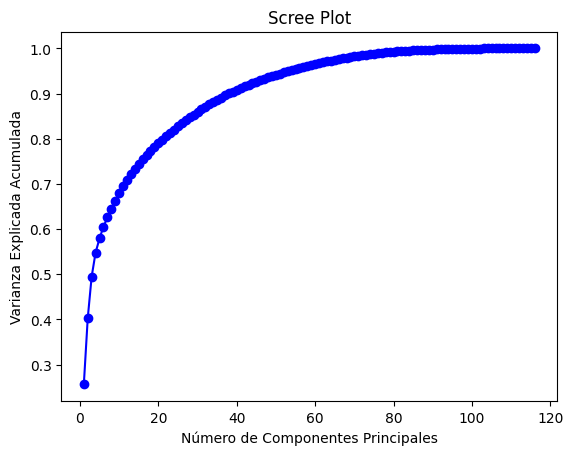

In [32]:
# Realizar análisis de componentes principales (PCA)
pca = PCA()
principal_components = pca.fit_transform(df_stats_scaled)

# Obtener la varianza explicada acumulada
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Graficar el scree plot
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Scree Plot')
plt.show()

In [35]:
pca = PCA(n_components=0.90)
principal_components = pca.fit_transform(df_stats_scaled)
pca.n_components_

38

In [36]:
principal_components.shape

(1983, 38)

## K-Means

In [37]:
evaluation = []

for k in range(2,11):
  #Como siempre, suele ser una buena práctica fijar la semilla
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(principal_components)
  labels = kmeans.labels_
  wcss = kmeans.inertia_
  silhouette = silhouette_score(principal_components, labels, metric='euclidean')

  evaluation.append({'k':k, 'wcss': wcss, 'silhouette':silhouette})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

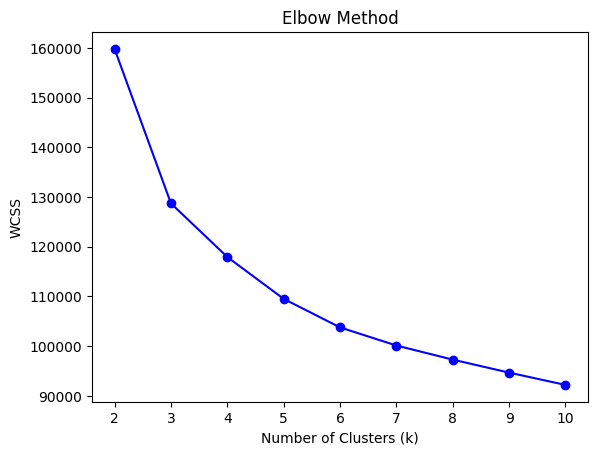

In [38]:
# Extract the 'k' and 'wcss' values from the list of dictionaries
k_values = [i['k'] for i in evaluation]
wcss_values = [i['wcss'] for i in evaluation]

# Plot the elbow curve
plt.plot(k_values, wcss_values, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

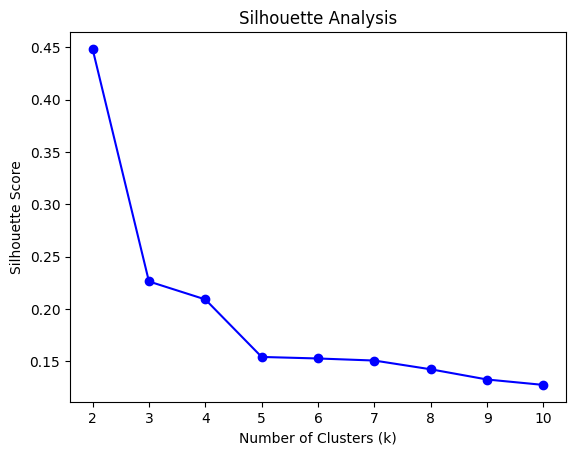

In [39]:
k_values = [i['k'] for i in evaluation]
silhouette_values = [i['silhouette'] for i in evaluation]

# Plot the silhouette scores for different values of k
plt.plot(k_values, silhouette_values, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

In [40]:
# Create a KMeans object and fit the data
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(principal_components)

# Get the cluster labels assigned by k-means
cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [41]:
df_stats['cluster'] = cluster_labels

In [55]:
df_stats[df_stats['cluster']==0].sample(10)

,Squad,Comp,Player,Nation,Pos,Age,PK,PKatt,CrdY,CrdR,Gls,Ast,G+A,G_minus_PK,G+A_minus_PK,xG,xAG,xG+xAG,npxG,npxG+xAG,SoT_percent,Sh_per_90,SoT_per_90,G_per_Sh,G_per_SoT,Dist,FK,npxG_per_Sh_Expected,G_minus_xG_Expected,np:G_minus_xG_Expected,Cmp_Total,Att_Total,Cmp_percent_Total,TotDist_Total,PrgDist_Total,Cmp_Short,Att_Short,Cmp_percent_Short,Cmp_Medium,Att_Medium,Cmp_percent_Medium,Cmp_Long,Att_Long,Cmp_percent_Long,A_minus_xAG,KP,Final_Third,PPA,CrsPA,PrgP,Live_Pass,Dead_Pass,FK_Pass,TB_Pass,Sw_Pass,Crs_Pass,TI_Pass,CK_Pass,Off_Outcomes,Blocks_Outcomes,SCA90_SCA,PassLive_SCA,PassDead_SCA,TO_SCA,Sh_SCA,Fld_SCA,Def_SCA,GCA90_GCA,PassLive_GCA,PassDead_GCA,TO_GCA,Sh_GCA,Fld_GCA,Def_GCA,Tkl_Tackles,TklW_Tackles,Def 3rd_Tackles,Mid 3rd_Tackles,Att 3rd_Tackles,Tkl_Challenges,Att_Challenges,Tkl_percent_Challenges,Lost_Challenges,Blocks_Blocks,Sh_Blocks,Pass_Blocks,Int,Tkl+Int,Clr,Err,Touches_Touches,Def Pen_Touches,Def 3rd_Touches,Mid 3rd_Touches,Att 3rd_Touches,Att Pen_Touches,Att_Take,Succ_Take,Succ_percent_Take,Tkld_percent_Take,Carries_Carries,TotDist_Carries,PrgDist_Carries,PrgC_Carries,Final_Third_Carries,CPA_Carries,Mis_Carries,Dis_Carries,Rec_Receiving,PrgR_Receiving,MP_Playing.Time,Min_Playing.Time,Mn_per_MP_Playing.Time,Min_percent_Playing.Time,Mins_90_Playing.Time,Mn_per_Start_Starts,Mn_per_Sub_Subs,PPM_Team.Success,onG_Team.Success,onGA_Team.Success,plus_per__minus_90_Team.Success,On_minus_Off_Team.Success,2CrdY,Fls,Fld,Off,PKwon,PKcon,OG,Recov,Won_Aerial,Lost_Aerial,Won_percent_Aerial,GA90,SoTA,Save_percent,CS_percent,Save_percent_Penalty,PSxG_Expected,PSxG_per_SoT_Expected,_per_90_Expected,Cmp_percent_Launched,Launch_percent_Passes,AvgLen_Passes,Launch_percent_Goal,AvgLen_Goal,Stp_percent_Crosses,#OPA_per_90_Sweeper,AvgDist_Sweeper,market_value_2021,market_value_2022,starts_from_total,Pos_unique,PK_accuracy,Tkl_won_percent,Aerial_duels,cluster
588,Espanyol,La Liga,Leandro Cabrera,URU,DF,30,0.0,0.0,0.19,0.00,0.05,0.00,0.05,0.05,0.05,0.03,0.02,0.05,0.03,0.05,33.3,0.49,0.16,0.11,0.33,11.7,0.0,0.06,0.02,0.02,39.41,52.27,75.4,813.30,407.76,13.32,15.03,88.7,19.24,22.95,83.9,6.19,12.46,49.7,-0.02,0.27,3.24,0.05,0.00,2.89,46.35,5.51,2.86,0.05,0.86,0.35,2.08,0.0,0.41,0.43,0.76,0.62,0.05,0.00,0.08,0.00,0.00,0.11,0.05,0.03,0.0,0.03,0.0,0.0,1.00,0.65,0.73,0.27,0.00,0.57,0.92,61.8,0.35,0.86,0.62,0.24,1.19,2.19,6.00,0.05,62.95,11.38,34.27,26.54,2.43,0.73,0.14,0.03,20.0,80.0,29.41,114.70,55.59,0.14,0.16,0.00,0.43,0.08,37.81,0.14,37,3330,90,97.4,37.0,90.0,0.00,1.14,1.05,1.32,-0.27,2.73,0.00,0.86,0.57,0.05,0.0,0.05,0.03,3.97,2.22,1.30,63.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3000000.0,4000000.0,1.00,DF,0.0,0.650000,3.52,0
1715,Stuttgart,Bundesliga,Waldemar Anton,GER,DF,25,0.0,0.0,0.21,0.03,0.07,0.03,0.10,0.07,0.10,0.07,0.05,0.12,0.07,0.12,25.0,0.83,0.21,0.08,0.33,14.1,0.0,0.09,-0.00,-0.00,53.51,63.40,84.4,1052.43,420.59,17.67,19.41,91.1,29.62,32.67,90.6,5.73,9.83,58.3,-0.01,0.24,3.12,0.24,0.03,3.75,60.56,2.78,1.56,0.03,0.69,0.38,1.11,0.0,0.07,0.49,1.28,1.08,0.00,0.03,0.07,0.07,0.03,0.07,0.07,0.00,0.0,0.00,0.0,0.0,1.39,0.90,0.76,0.52,0.10,0.66,1.11,59.4,0.45,0.94,0.56,0.38,1.11,2.50,4.03,0.03,74.72,10.24,38.75,33.65,3.30,1.18,0.76,0.59,77.3,22.7,47.08,266.04,138.02,0.90,0.49,0.00,0.87,0.45,48.78,0.42,29,2595,89,84.8,28.8,89.0,0.00,1.07,1.22,1.67,-0.45,0.52,0.00,1.01,0.56,0.03,0.0,0.00,0.00,7.22,2.15,1.81,54.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9000000.0,6000000.0,1.00,DF,0.0,0.647482,3.96,0
833,Inter,Serie A,Stefan de Vrij,NED,DF,29,0.0,0.0,0.11,0.00,0.00,0.00,0.00,0.00,0.00,0.10,0.00,0.10,0.10,0.10,15.0,0.75,0.11,0.00,0.00,10.5,0.0,0.13,-0.10,-0.10,53.69,58.62,91.6,1020.04,337.24,18.10,19.51,92.7,30.56,31.90,95.8,4.55,6.23,73.1,0.00,0.00,2.28,0.11,0.00,2.69,56.60,1.94,0.93,0.00,0.11,0.07,0.00,0.0,0.07,0.22,0.52,0.34,0.00,0.00,0.19,0.00,0.00,0.11,0.07,0.00,0.0,0.04,0.0,0.0,1.42,1.08,0.82,0.60,0.00,0.45,0.63,70.6,0.19,0.63,0.30,0.34,1.19,2.61,1.94,0.00,65.37,7.65,34.63,29.70,1.46,0

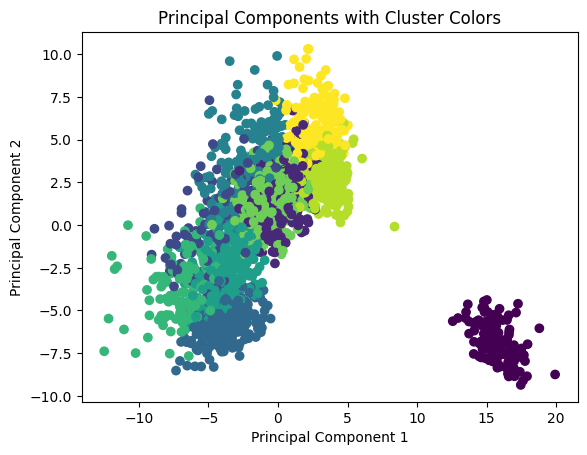

In [45]:
# Plot the first two principal components with cluster colors
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Components with Cluster Colors')
plt.show()

In [46]:
df_stats.shape

(1983, 157)

### Analizo los clusters resultantes

## Buscando jugadores similares

In [47]:
variables = list(df_stats.select_dtypes(include=[int, float]).columns)

In [48]:
variables = list(df_stats.Player)

# Crear una función que acepte la variable seleccionada y la grafique utilizando la función boxplot de Seaborn
def get_similar_players(variable):
    # Find the index of the specific player in the original dataframe
    specific_player_index = df_stats[df_stats['Player'] == variable].index[0]

    # Get the principal components of the specific player
    specific_player_pc = principal_components[specific_player_index]

    # Compute the distances between the specific player and all other observations
    distances = euclidean_distances(specific_player_pc.reshape(1, -1), principal_components)

    # Get the indices of the most similar observations
    k_similar_indices = np.argsort(distances.flatten())[1:10]

    # Get the names of the similar players from the original dataframe
    similar_players = df_stats.iloc[k_similar_indices]['Player']

    print('\nJugadores similares a ', df_stats.iloc[specific_player_index].Player,': \n', '\n', similar_players)

# Utilizar la función interact de ipywidgets para crear la lista desplegable y actualizar el gráfico cada vez que se selecciona una nueva variable
interact(get_similar_players, variable=widgets.Dropdown(options=variables))

interactive(children=(Dropdown(description='variable', options=('Martin Agirregabiria', 'Rubén Duarte', 'Gonza…

<function __main__.get_similar_players(variable)>

## otro

Para tratar cada jugador como un vector de estadísticas, puedes utilizar sus valores en las diferentes variables numéricas como las componentes de un vector. Por ejemplo, si tienes un conjunto de datos con jugadores y sus estadísticas en las variables A, B y C, entonces cada jugador puede representarse como un vector de la forma [A, B, C].

Para encontrar la similitud entre dos jugadores, puedes calcular la distancia entre sus vectores utilizando una medida de distancia como la distancia euclidiana o la similitud del coseno. Para ponderar dos jugadores y encontrar un jugador similar, puedes calcular un nuevo vector como una combinación lineal de los vectores de los dos jugadores ponderados por ciertos coeficientes, y luego encontrar el jugador cuyo vector se parece más al nuevo vector utilizando una medida de similitud como la similitud del coseno.

Aquí te dejo un ejemplo de cómo podrías implementar esto en Python utilizando la biblioteca NumPy:

In [ ]:
import numpy as np

# crear una matriz con las estadísticas de los jugadores
stats_matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# calcular la similitud del coseno entre los jugadores 0 y 1
similarity = np.dot(stats_matrix[0], stats_matrix[1]) / (np.linalg.norm(stats_matrix[0]) * np.linalg.norm(stats_matrix[1]))

# ponderar los jugadores 0 y 1 con coeficientes de 0.3 y 0.7, y encontrar el jugador más parecido
weighted_vector = 0.3 * stats_matrix[0] + 0.7 * stats_matrix[1]
distances = np.apply_along_axis(lambda x: np.dot(x, weighted_vector) / (np.linalg.norm(x) * np.linalg.norm(weighted_vector)), 1, stats_matrix)
most_similar_player_index = np.argmax(distances)
most_similar_player = stats_matrix[most_similar_player_index]


En este ejemplo, la matriz stats_matrix representa las estadísticas de tres jugadores en las variables A, B y C. Primero se calcula la similitud del coseno entre los jugadores 0 y 1. Luego se ponderan los jugadores 0 y 1 con coeficientes de 0.3 y 0.7, y se encuentra el jugador más parecido utilizando la similitud del coseno. El índice del jugador más parecido se almacena en most_similar_player_index, y sus estadísticas se almacenan en most_similar_player.